In [37]:
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


# Sales data
umsatzdaten = pd.read_csv("Internal/umsatzdaten_gekuerzt.csv")

# Weather data
wetter = pd.read_csv("Internal/wetter.csv")

# Kieler Woche data
kiwo = pd.read_csv("Internal/kiwo.csv")

# Ensure date format is consistent
umsatzdaten["Datum"] = pd.to_datetime(umsatzdaten["Datum"])
kiwo["Datum"] = pd.to_datetime(kiwo["Datum"])
wetter["Datum"] = pd.to_datetime(wetter["Datum"])

# Merge the DataFrames on the 'Datum' column
merged_df = umsatzdaten.merge(kiwo, on="Datum", how="outer").merge(
    wetter, on="Datum", how="outer"
)

# Ensure 'Datum' to datetime and extract the year, day of the year, and weekday
merged_df["Datum"] = pd.to_datetime(merged_df["Datum"])

# Create a DataFrame with all combinations of Datum and Warengruppe (1-6)
all_dates = pd.DataFrame({"Datum": merged_df["Datum"].unique()})
all_warengruppen = pd.DataFrame({"Warengruppe": range(1, 7)})
all_combinations = all_dates.merge(all_warengruppen, how="cross")

# Merge with the original dataframe to ensure every date has all 6 Warengruppen
merged_df = all_combinations.merge(merged_df, on=["Datum", "Warengruppe"], how="left")

# Optional: sort by date and Warengruppe for readability
merged_df = merged_df.sort_values(["Datum", "Warengruppe"]).reset_index(drop=True)

# Constructing new variables for later use
merged_df["Jahr"] = merged_df["Datum"].dt.year
merged_df["Monat"] = merged_df["Datum"].dt.month
merged_df["Tag_im_Jahr"] = merged_df["Datum"].dt.dayofyear
merged_df["Wochentag"] = merged_df["Datum"].dt.weekday + 1  # 1=Monday, 7=Sunday

# in 'KielerWoche' fill NaN values  with 0
merged_df["KielerWoche"] = merged_df["KielerWoche"].fillna(
    0
)  # 0 = no Kieler Woche, 1 = Kieler Woche

# Set the ID in the format yymmddX (e.g., 1307053 for 2013-07-05, Warengruppe 3)
merged_df["id"] = merged_df["Datum"].dt.strftime("%y%m%d") + merged_df[
    "Warengruppe"
].astype(str)
merged_df["id"] = merged_df["id"].astype(int)


# Just for review ------------------------------------------------------------------


# Checking the data types
print("\nData types:")
print(merged_df.dtypes)

print(merged_df["id"])

merged_df.to_html("merged_df.html", index=False)



Data types:
Datum                  datetime64[ns]
Warengruppe                     int64
id                              int64
Umsatz                        float64
KielerWoche                   float64
Bewoelkung                    float64
Temperatur                    float64
Windgeschwindigkeit           float64
Wettercode                    float64
Jahr                            int32
Monat                           int32
Tag_im_Jahr                     int32
Wochentag                       int32
dtype: object
0        1201011
1        1201012
2        1201013
3        1201014
4        1201015
5        1201016
6        1201021
7        1201022
8        1201023
9        1201024
10       1201025
11       1201026
12       1201031
13       1201032
14       1201033
15       1201034
16       1201035
17       1201036
18       1201041
19       1201042
20       1201043
21       1201044
22       1201045
23       1201046
24       1201051
25       1201052
26       1201053
27       1201054
28 

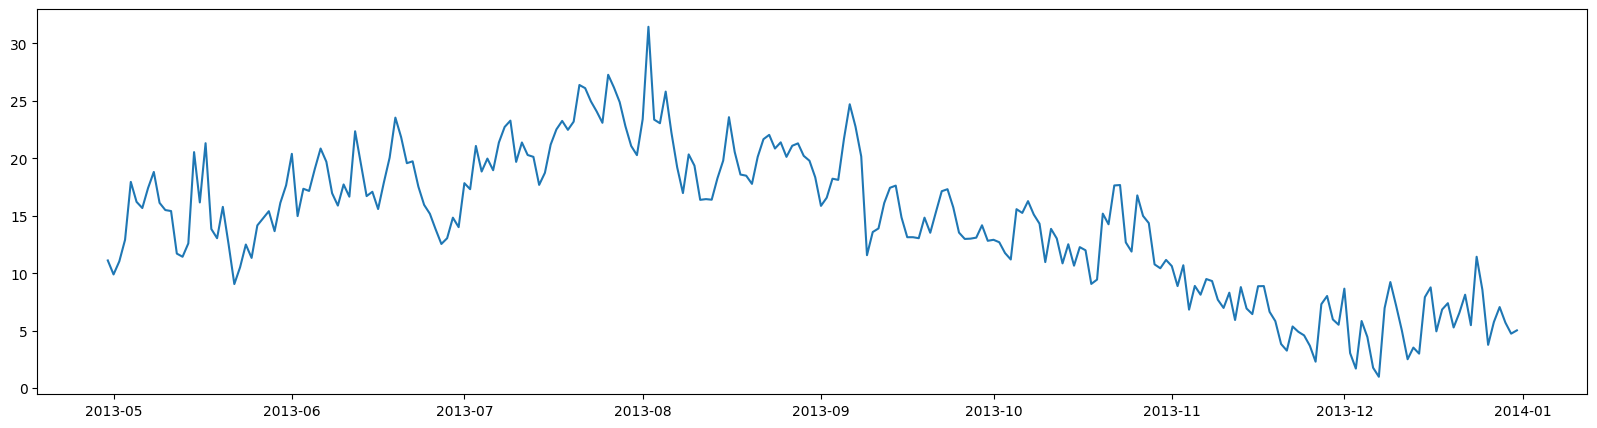

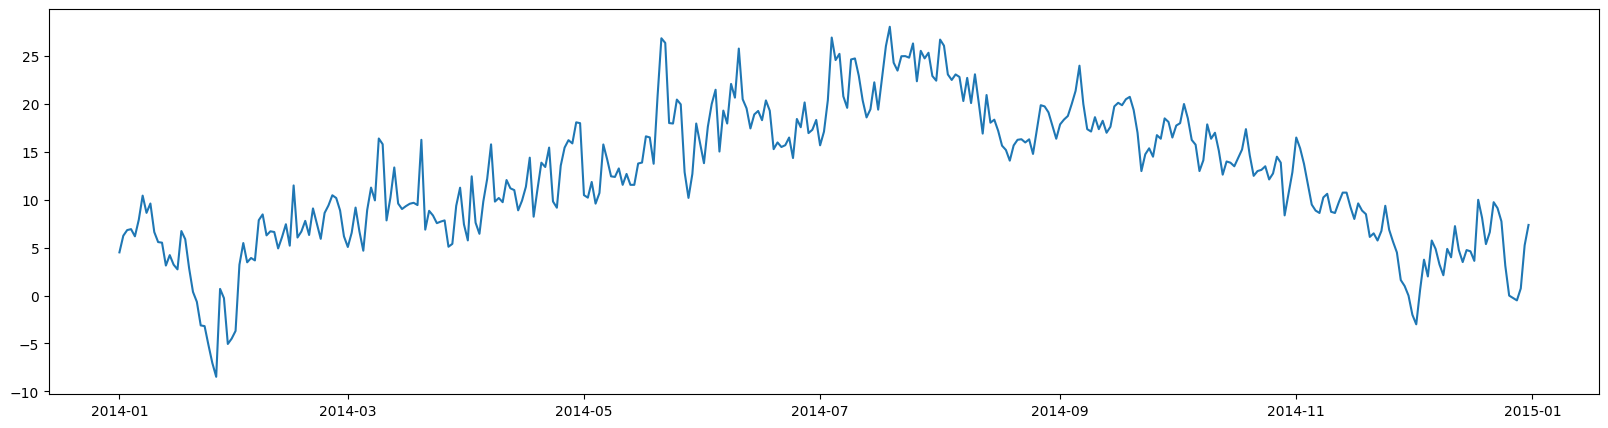

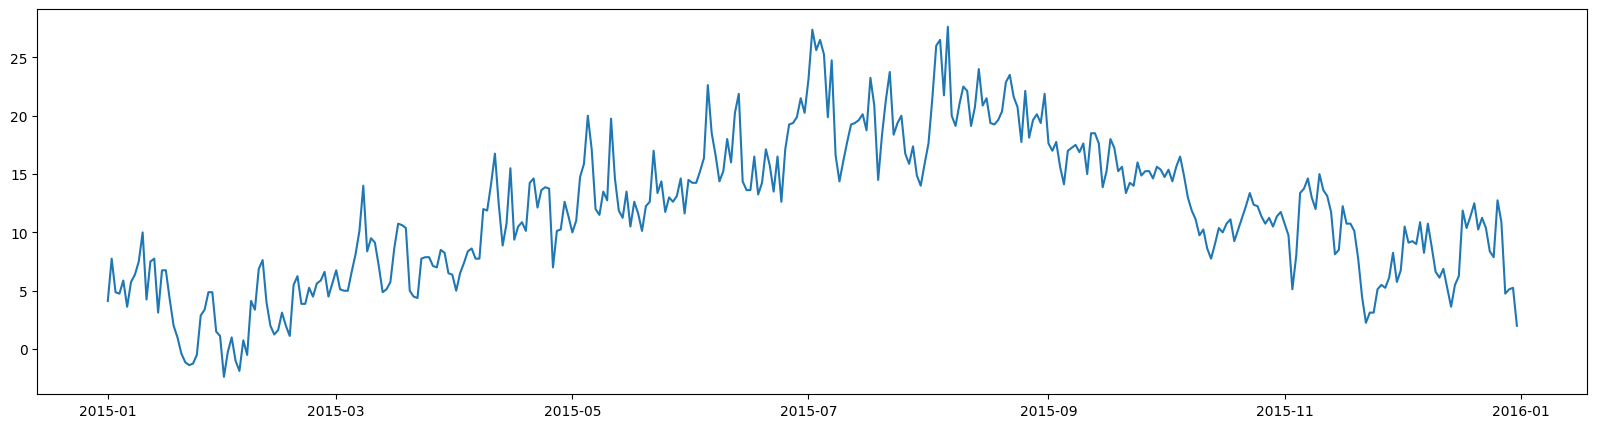

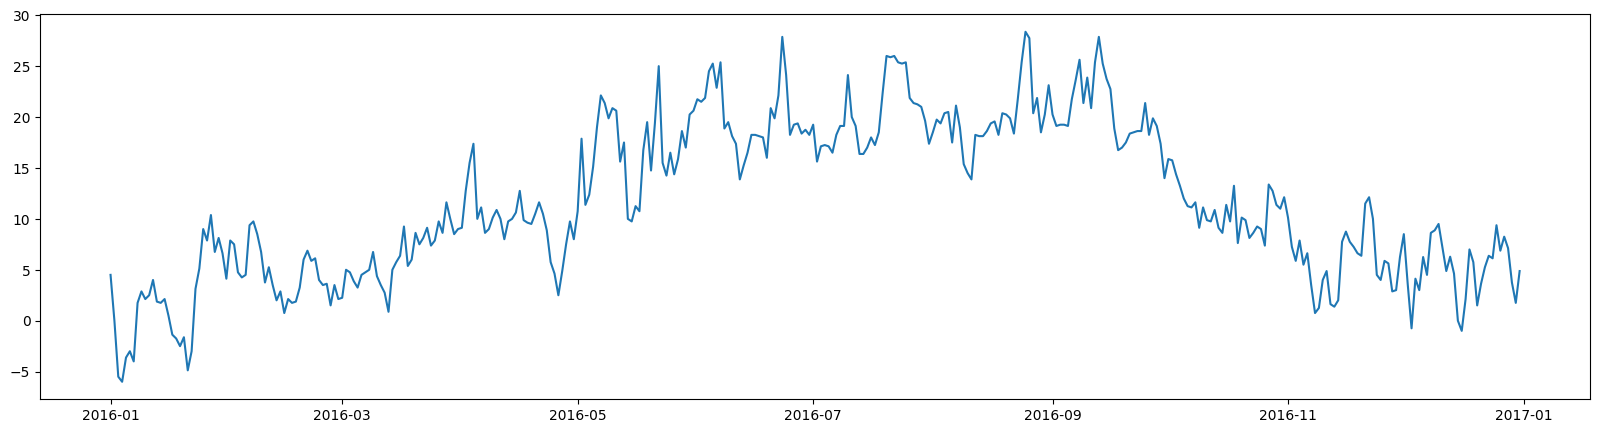

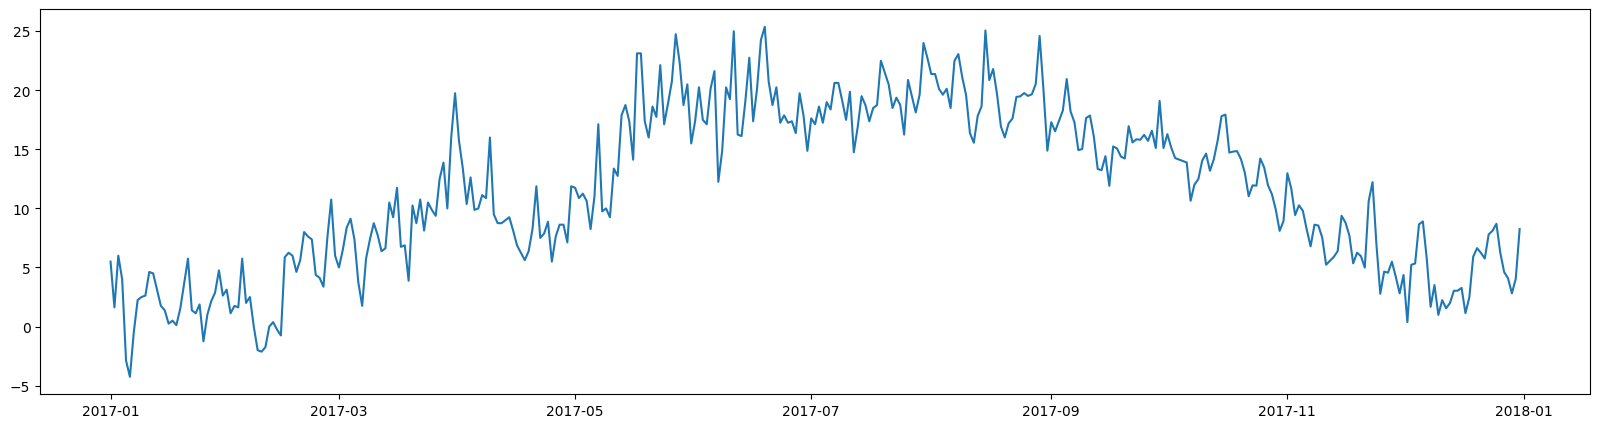

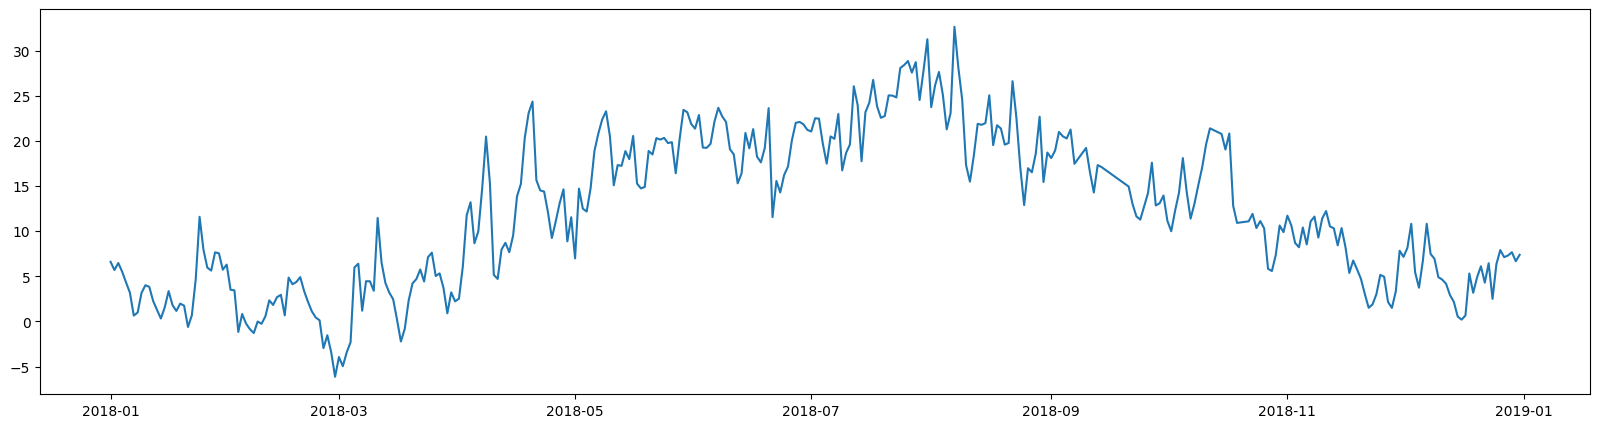

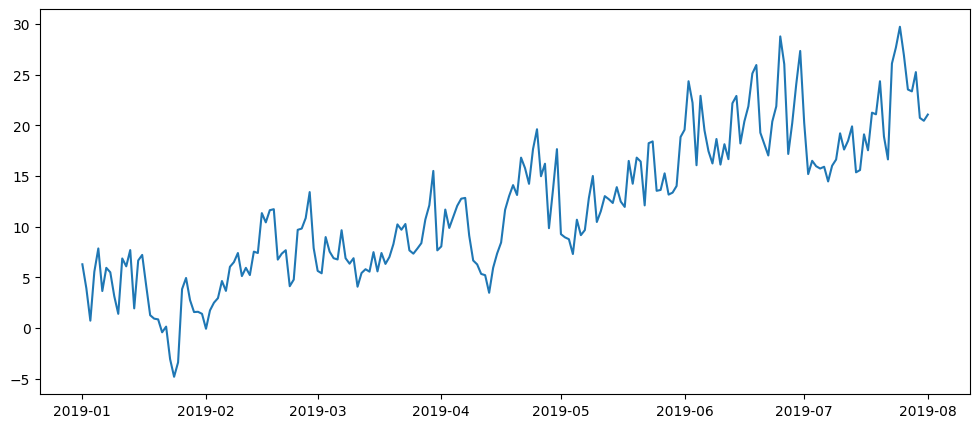

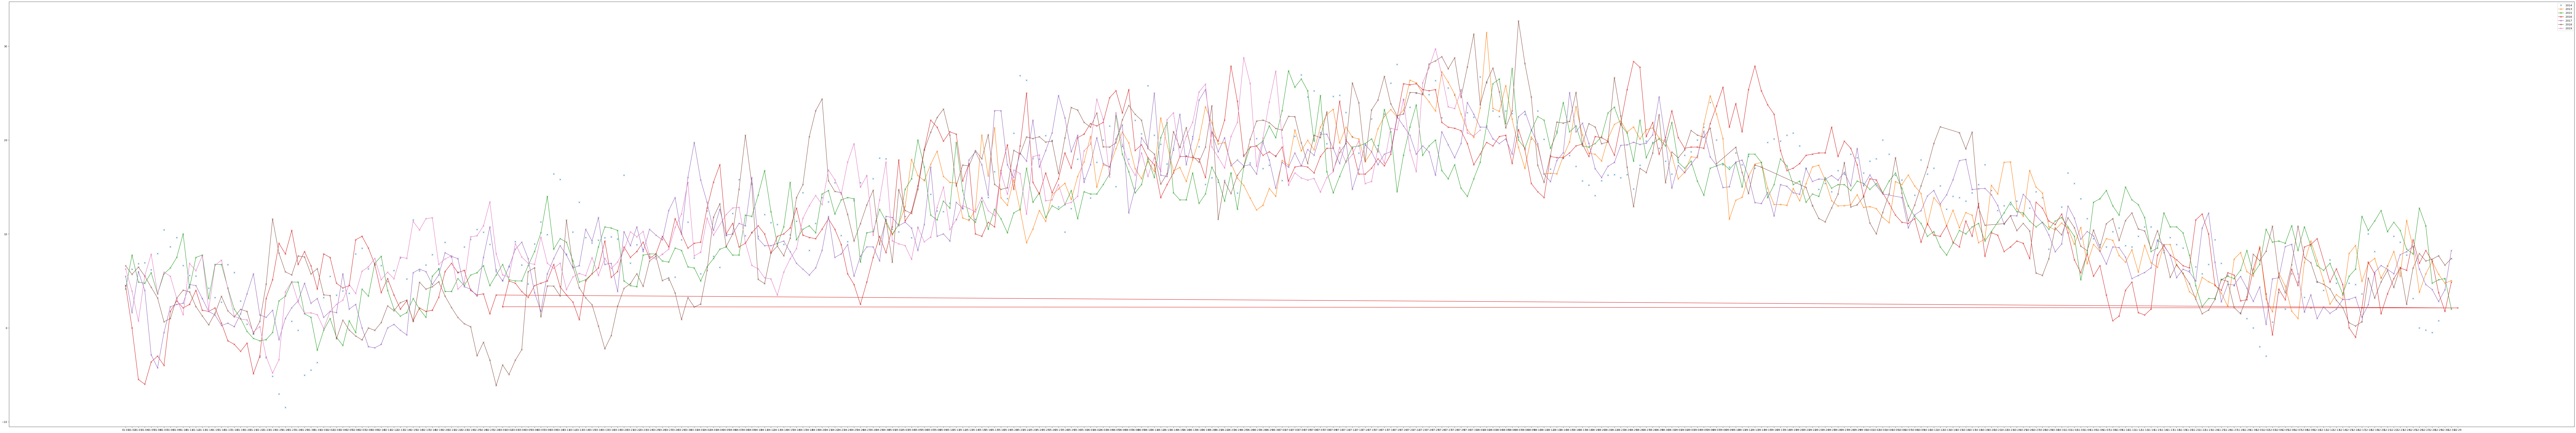

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wetter["Temperatur"].mean()
wetter_2013 = wetter[wetter["Datum"].dt.year == 2013].copy()
wetter_2014 = wetter[wetter["Datum"].dt.year == 2014].copy()
wetter_2015 = wetter[wetter["Datum"].dt.year == 2015].copy()
wetter_2016 = wetter[wetter["Datum"].dt.year == 2016].copy()
wetter_2017 = wetter[wetter["Datum"].dt.year == 2017].copy()
wetter_2018 = wetter[wetter["Datum"].dt.year == 2018].copy()
wetter_2019 = wetter[wetter["Datum"].dt.year == 2019].copy()

# Create a new column for month and day
wetter_2013["monat_tag"] = wetter_2013["Datum"].dt.strftime("%m-%d")
wetter_2014["monat_tag"] = wetter_2014["Datum"].dt.strftime("%m-%d")
wetter_2015["monat_tag"] = wetter_2015["Datum"].dt.strftime("%m-%d")
wetter_2016["monat_tag"] = wetter_2016["Datum"].dt.strftime("%m-%d")
wetter_2017["monat_tag"] = wetter_2017["Datum"].dt.strftime("%m-%d")
wetter_2018["monat_tag"] = wetter_2018["Datum"].dt.strftime("%m-%d")
wetter_2019["monat_tag"] = wetter_2019["Datum"].dt.strftime("%m-%d")


plt.figure(figsize=(20, 5))
plt.plot(wetter_2013["Datum"], wetter_2013["Temperatur"], label="2013", marker="")
plt.figure(figsize=(20, 5))
plt.plot(wetter_2014["Datum"], wetter_2014["Temperatur"], label="2014", marker="")
plt.figure(figsize=(20, 5))
plt.plot(wetter_2015["Datum"], wetter_2015["Temperatur"], label="2015", marker="")
plt.figure(figsize=(20, 5))
plt.plot(wetter_2016["Datum"], wetter_2016["Temperatur"], label="2016", marker="")
plt.figure(figsize=(20, 5))
plt.plot(wetter_2017["Datum"], wetter_2017["Temperatur"], label="2017", marker="")
plt.figure(figsize=(20, 5))
plt.plot(wetter_2018["Datum"], wetter_2018["Temperatur"], label="2018", marker="")
plt.figure(figsize=(12, 5))
plt.plot(wetter_2019["Datum"], wetter_2019["Temperatur"], label="2019", marker="")

plt.figure(figsize=(180, 30))
plt.plot(
    wetter_2014["monat_tag"],
    wetter_2014["Temperatur"],
    label="2014",
    marker="x",
    linestyle=" ",
)

plt.plot(wetter_2013["monat_tag"], wetter_2013["Temperatur"], label="2013", marker="x", linestyle = "-")
plt.plot(wetter_2015["monat_tag"], wetter_2015["Temperatur"], label="2015", marker="x",linestyle = "-")
plt.plot(wetter_2016["monat_tag"], wetter_2016["Temperatur"], label="2016", marker="x",linestyle = "-")
plt.plot(wetter_2017["monat_tag"], wetter_2017["Temperatur"], label="2017", marker="x",linestyle = "-")  
plt.plot(wetter_2018["monat_tag"], wetter_2018["Temperatur"], label="2018", marker="x", linestyle = "-")
plt.plot(wetter_2019["monat_tag"], wetter_2019["Temperatur"], label="2019", marker="x", linestyle = "-")
plt.legend()
plt.show()


In [62]:
print(wetter_2013)


         Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
333 2013-04-30         3.0   11.116666                   15         0.0   
334 2013-05-01         0.0    9.900000                   11         NaN   
335 2013-05-02         1.0   11.037500                   12         NaN   
336 2013-05-03         0.0   12.912500                    9         NaN   
337 2013-05-04         0.0   17.950000                   18         NaN   
338 2013-05-05         3.0   16.212500                   10         NaN   
339 2013-05-06         0.0   15.675000                    8         NaN   
340 2013-05-07         1.0   17.412500                   10        21.0   
341 2013-05-08         4.0   18.812500                    9        21.0   
342 2013-05-09         7.0   16.125000                   11        21.0   
343 2013-05-10         5.0   15.500000                   12        21.0   
344 2013-05-11         7.0   15.412500                   11         NaN   
345 2013-05-12         7.